In [1]:
# Step 1: Loading and Preprocessing the Image Data

In [11]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Use this cell if u have not downloaded the dataset else you below cell


# Load the MNIST dataset
# (train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the pixel values to be between 0 and 1
# train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
# test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
# train_labels = tf.keras.utils.to_categorical(train_labels, 10)
# test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [4]:
train_csv_path = 'Dataset/MNIST/Download/mnist_train.csv'
test_csv_path  = 'Dataset/MNIST/Download/mnist_test.csv'

In [6]:
train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

In [7]:
x_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
x_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

In [8]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

In [9]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

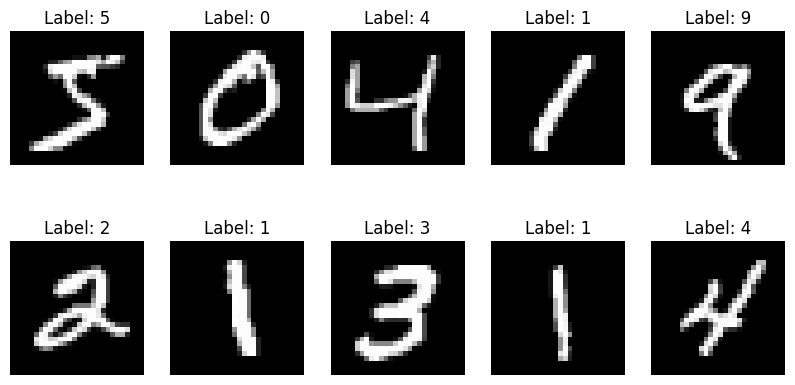

In [10]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y_train[i].argmax()}')
    plt.axis('off')
plt.show()

In [ ]:
# Step 2: Defining the Model’s Architecture

In [15]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)             │ (None, 26, 26, 32)    │          320 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_2               │ (None, 13, 13, 32)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_4 (Conv2D)             │ (None, 11, 11, 64)    │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_3               │ (None, 5, 5, 64)      │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_5 (Conv2D)             │ (None, 3, 3, 64)      │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten_1 (Flatten)           │ (None, 576)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 64)            │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_2 (Dense)               │ (None, 10)            │          650 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 3: Training the Model

In [17]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.8600 - loss: 0.4782 - val_accuracy: 0.9812 - val_loss: 0.0648
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9821 - loss: 0.0616 - val_accuracy: 0.9850 - val_loss: 0.0506
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9890 - loss: 0.0353 - val_accuracy: 0.9831 - val_loss: 0.0565
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9914 - loss: 0.0280 - val_accuracy: 0.9888 - val_loss: 0.0367
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9931 - loss: 0.0217 - val_accuracy: 0.9876 - val_loss: 0.0435
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9940 - loss: 0.0190 - val_accuracy: 0.9843 - val_loss: 0.0567
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.9939 - loss: 0.0174 - val_accuracy: 0.9887 - val_loss: 0.0421
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9960 - loss: 0.0124 - 

In [ ]:
# Step 4: Estimating the Model’s Performance

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest Accuracy: {test_acc:.4f}')

313/313 - 2s - 5ms/step - accuracy: 0.9913 - loss: 0.0309

Test Accuracy: 0.9913


In [19]:
predictions = model.predict(x_test)
predicted_classes = predictions.argmax(axis=1)
true_classes = y_test.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [20]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, predicted_classes))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



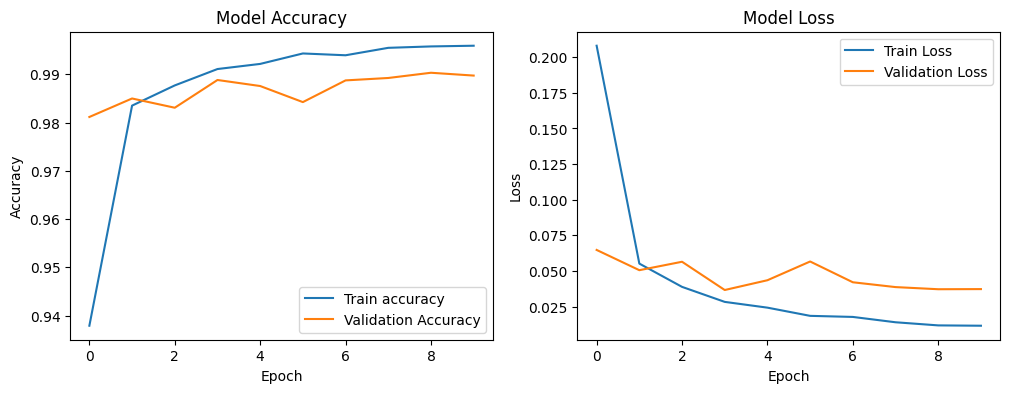

In [21]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()


# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

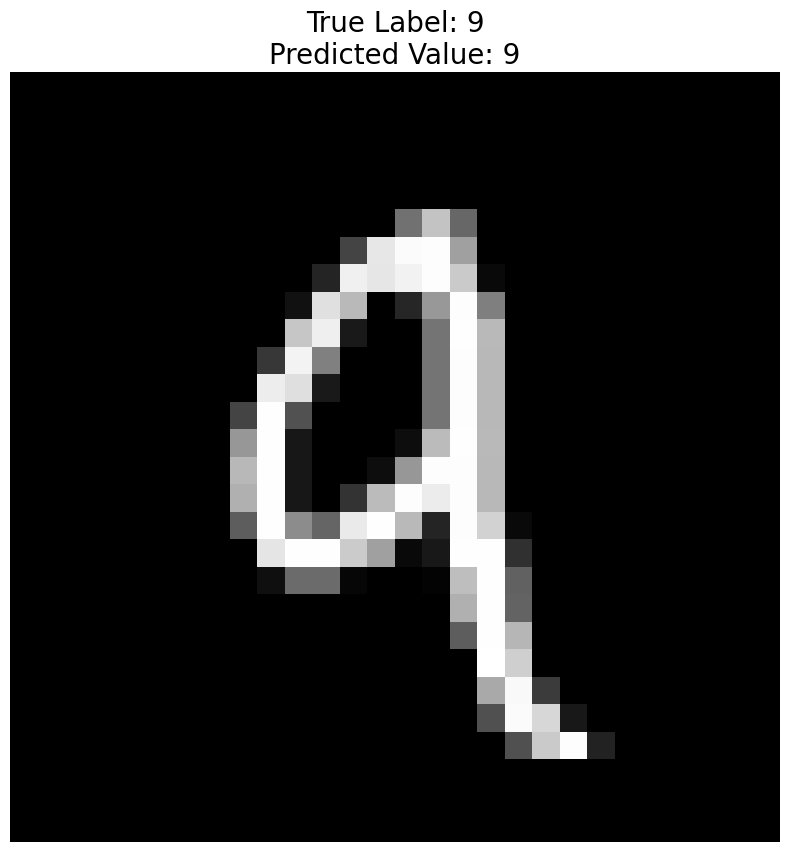

In [23]:
index = 125

class_names = [str(i) for i in range(10)]

true_label = class_names[np.argmax(y_test[index])]
predicted_label = class_names[np.argmax(predictions[index], axis=0)]

plt.figure(figsize=[10, 10])
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_label}\nPredicted Value: {predicted_label}", size=20)
plt.axis('off')
plt.show()